In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
con=pd.read_excel('concrete.xls')
con.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
col_name=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','compressive strength']

In [4]:
con.columns=col_name

In [5]:
con.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [6]:
con.shape

(1030, 9)

In [7]:
con.dtypes

Cement                  float64
Blast Furnace Slag      float64
Fly Ash                 float64
Water                   float64
Superplasticizer        float64
Coarse Aggregate        float64
Fine Aggregate          float64
Age                       int64
compressive strength    float64
dtype: object

In [8]:
con.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
# no missing values
con.isnull().sum()

Cement                  0
Blast Furnace Slag      0
Fly Ash                 0
Water                   0
Superplasticizer        0
Coarse Aggregate        0
Fine Aggregate          0
Age                     0
compressive strength    0
dtype: int64

# Univariate Analysis

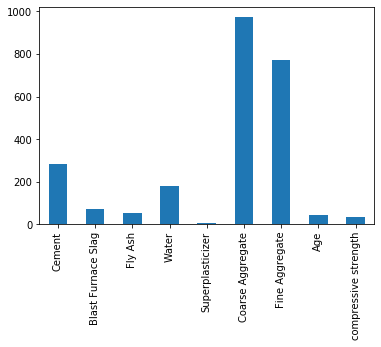

In [10]:
con.describe().loc['mean',:].plot.bar()

In [11]:
col=con.columns.values

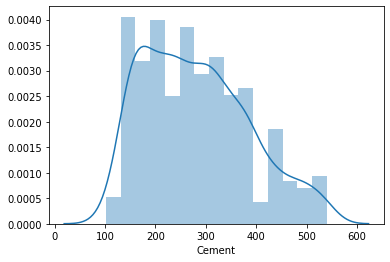

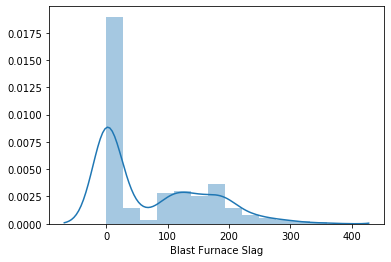

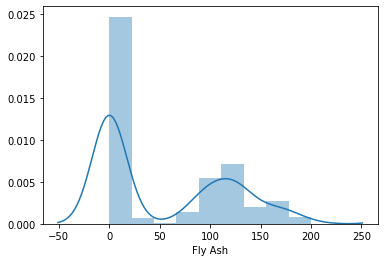

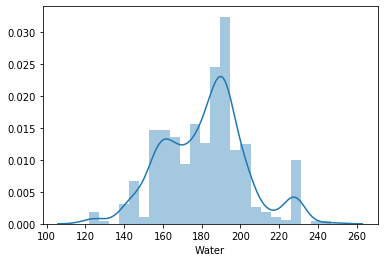

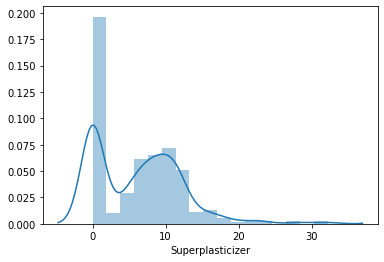

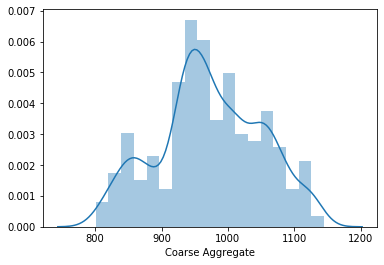

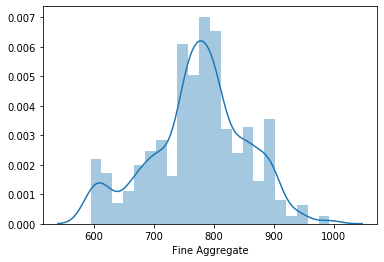

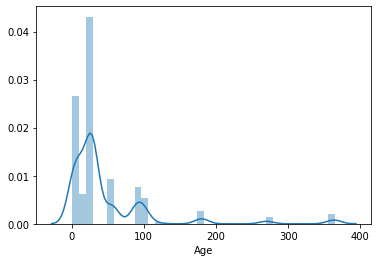

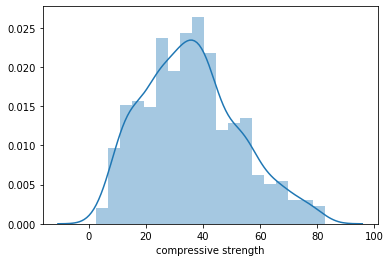

In [12]:
for i in col:
    plt.subplots()
    plt.xlabel(i)
    sns.distplot(con[i])

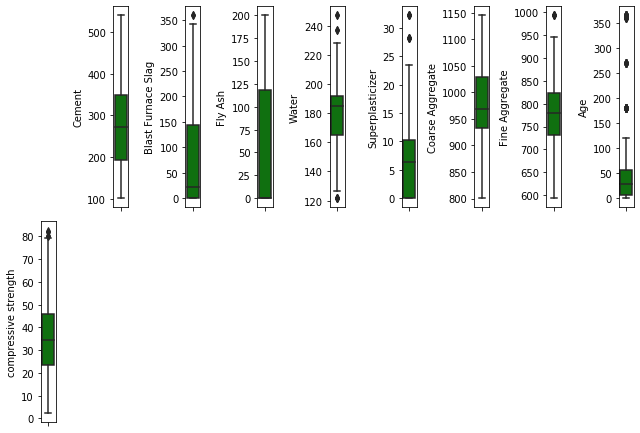

In [13]:
plt.figure(figsize=(9,27))
for i in range(len(col)):
    plt.subplot(9,9,i+2)
    sns.boxplot(con[col[i]], color='green', orient='v')
    plt.tight_layout()

# Bivariate Analysis

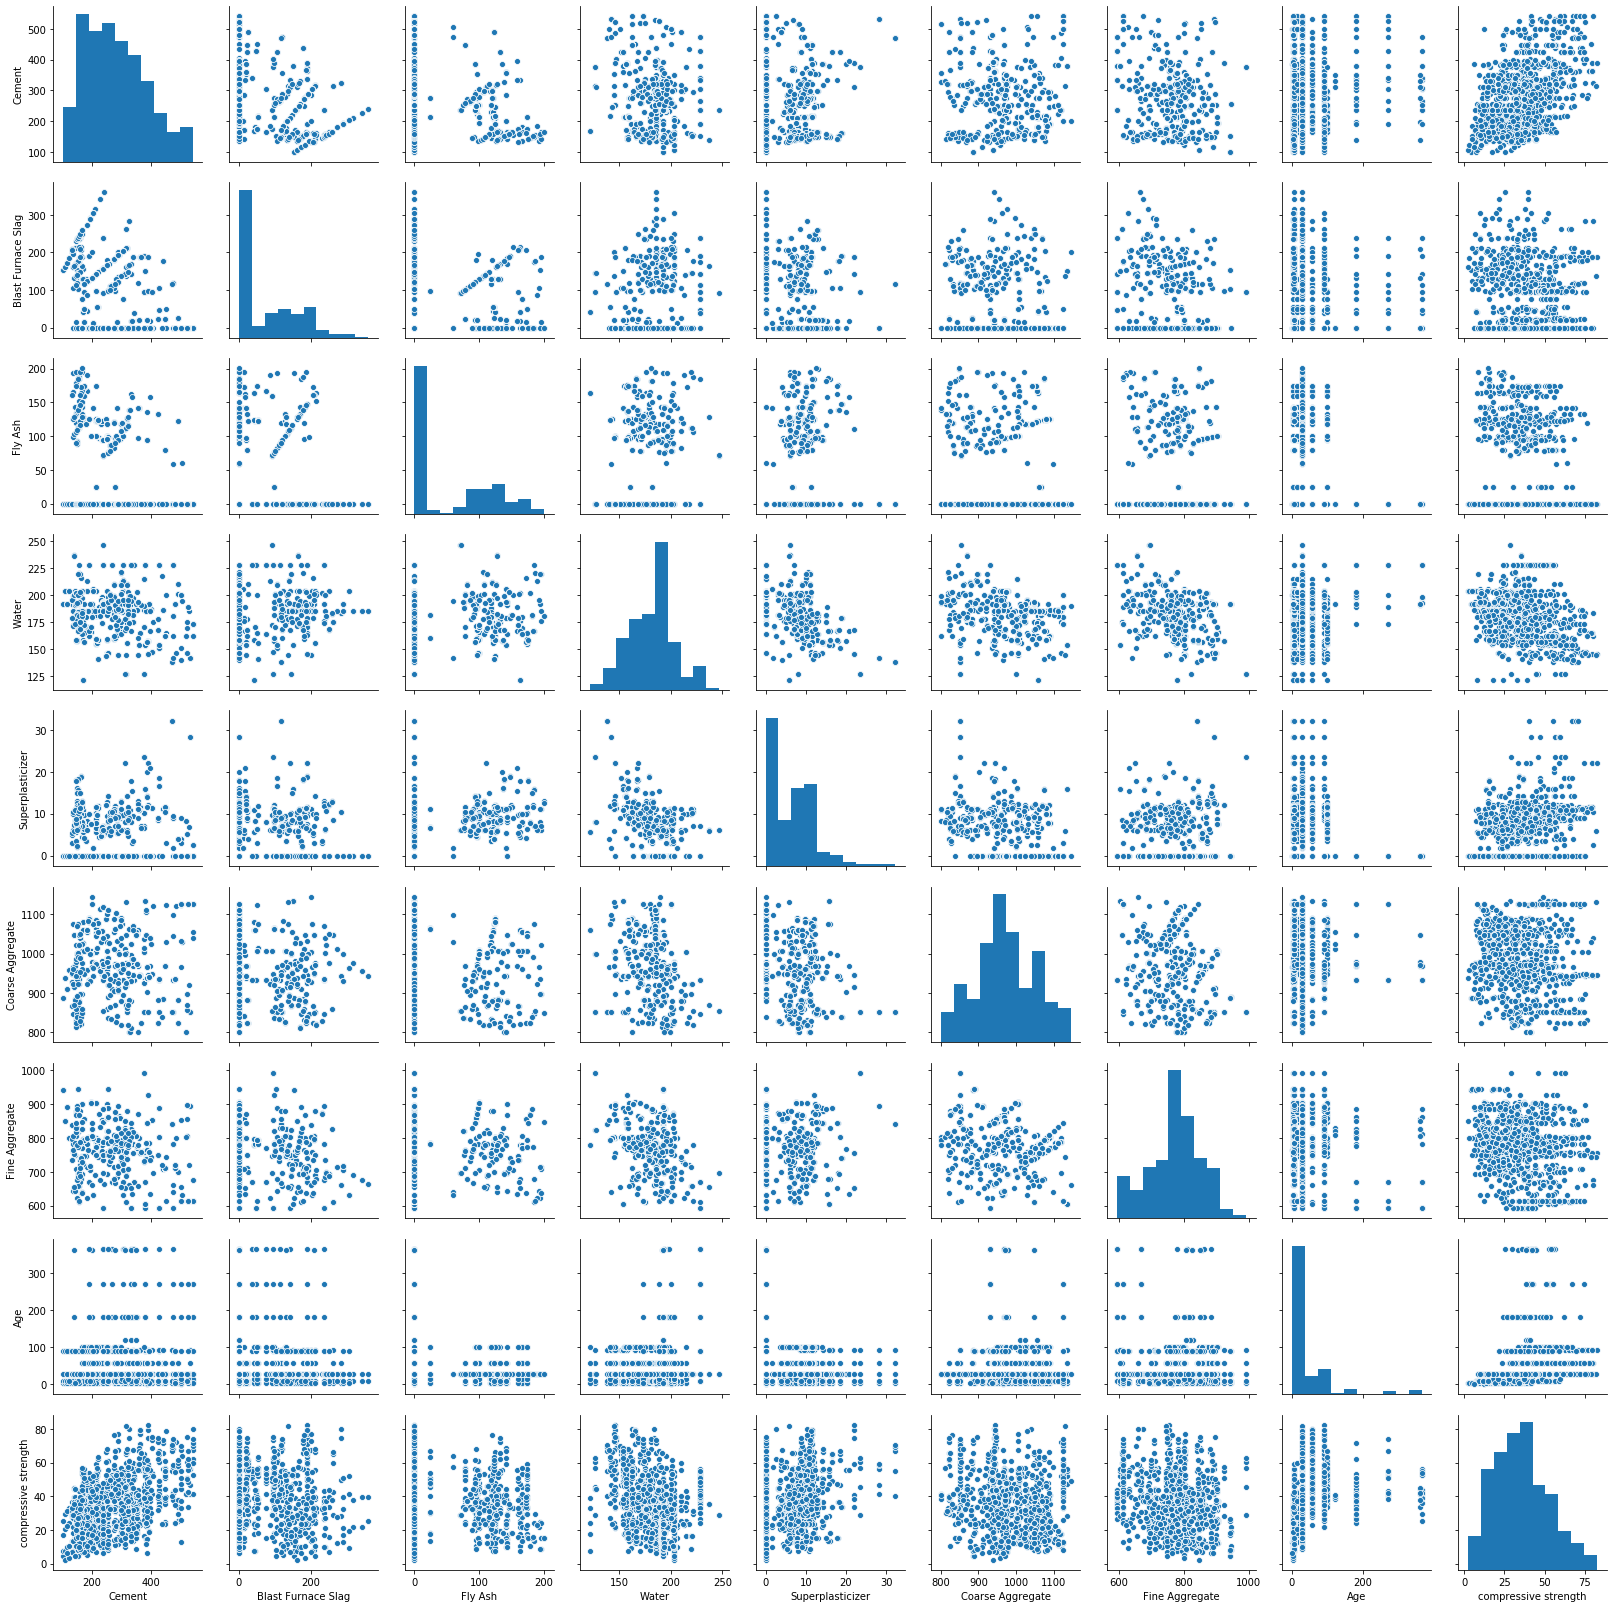

In [14]:
sns.pairplot(con)

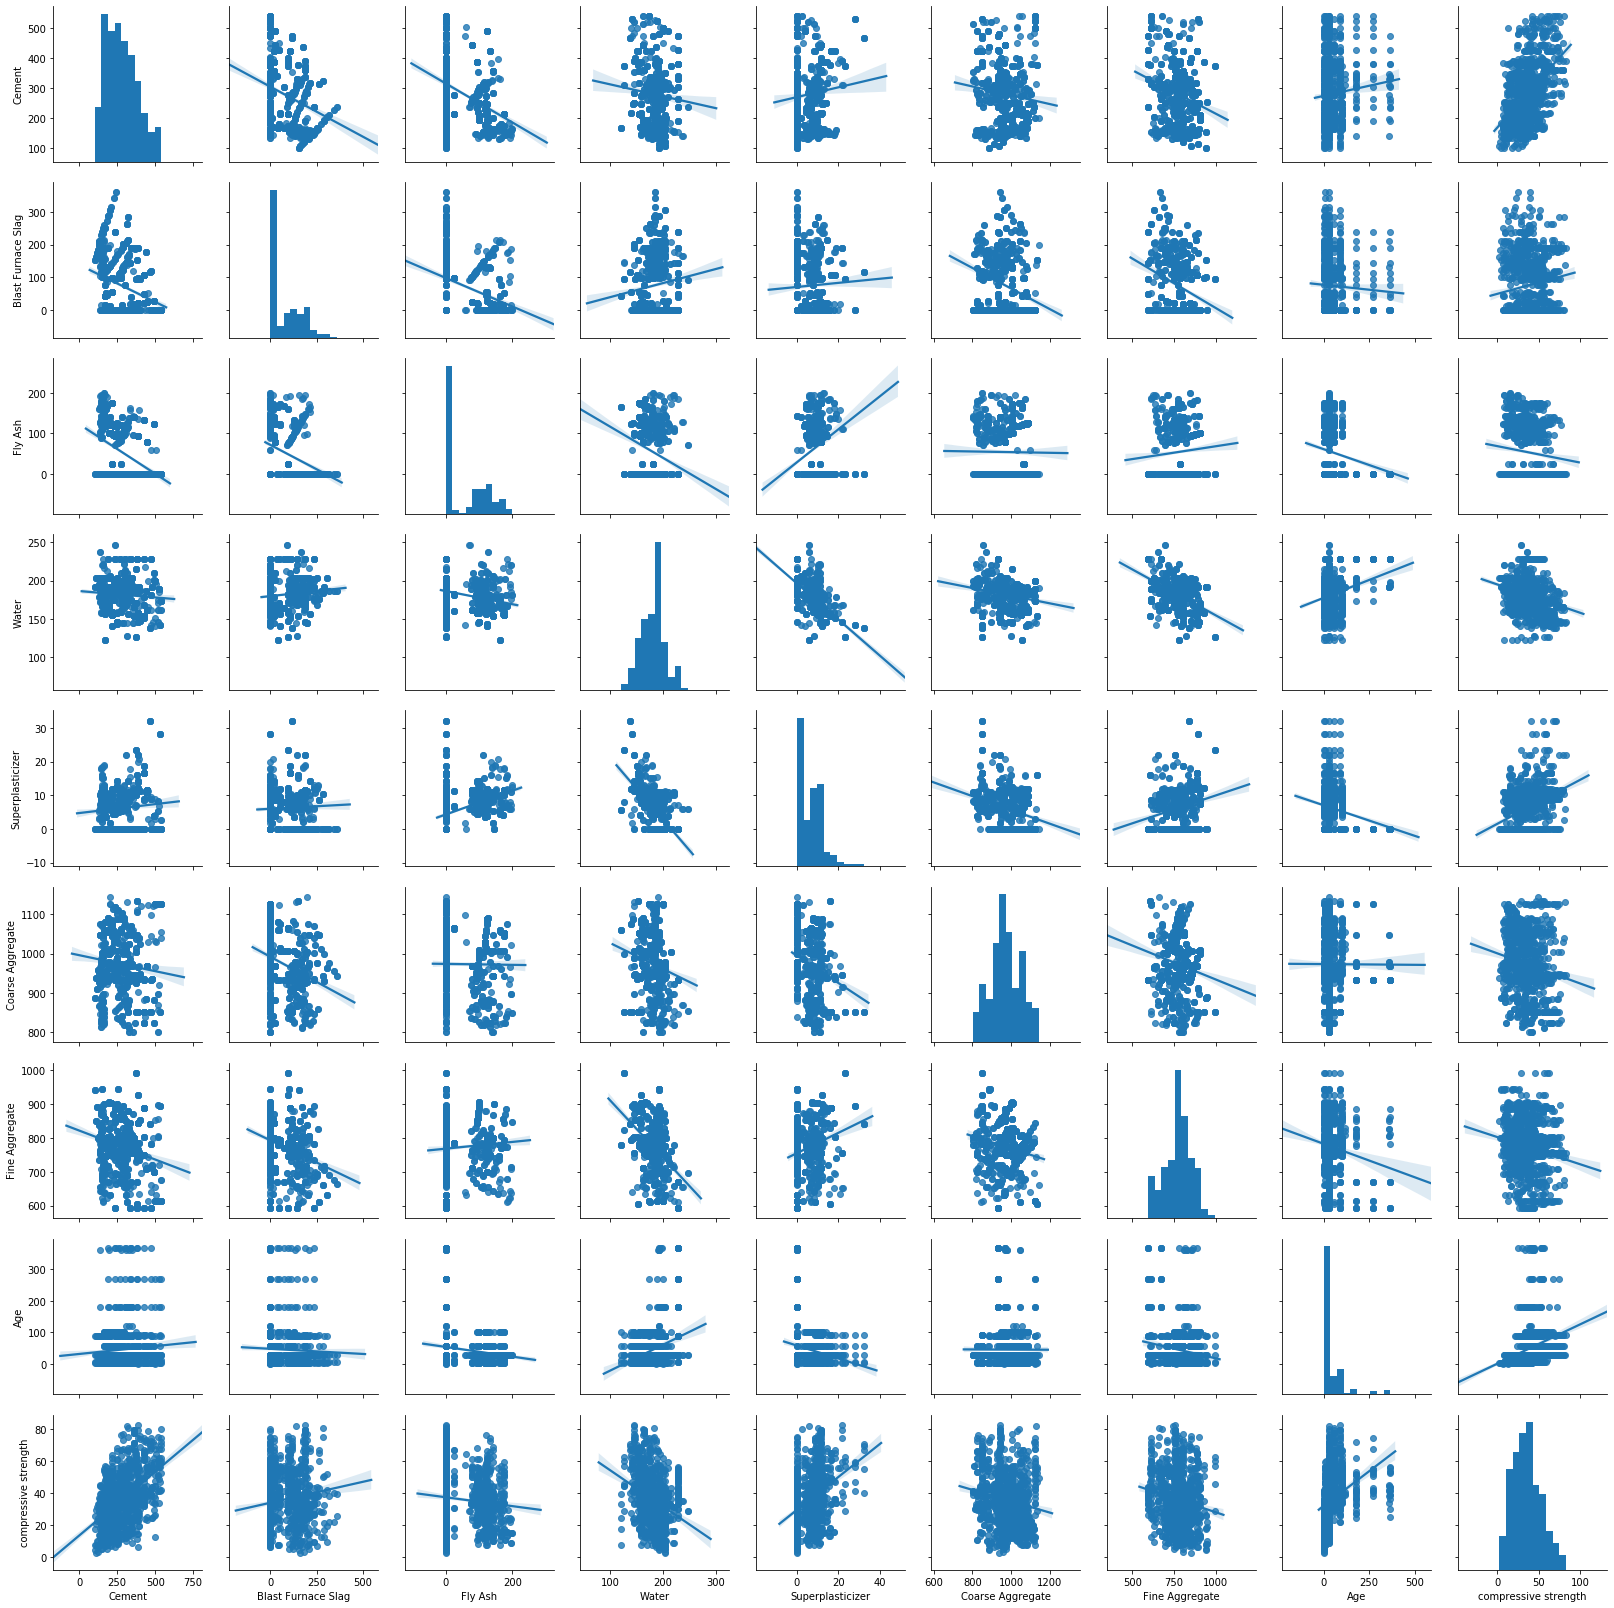

In [15]:
sns.pairplot(con, kind='reg')

In [16]:
con.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
compressive strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


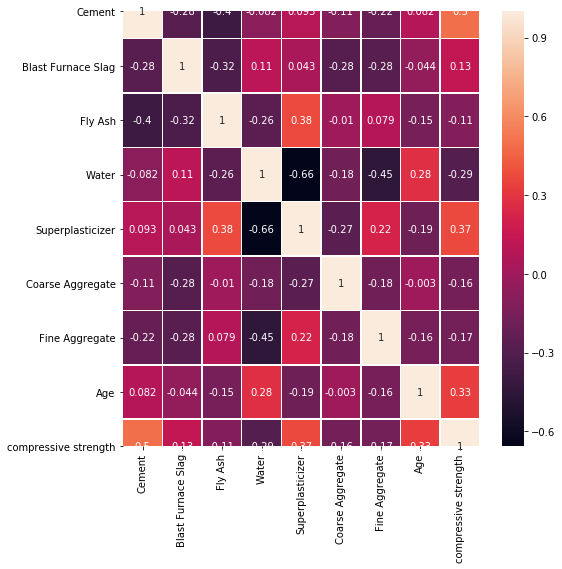

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(con.corr(), annot=True, linewidths=0.5, square=False)

In [18]:
# No missing values

# Outliers

In [19]:
from scipy.stats import zscore

In [20]:
z=np.abs(zscore(con))

In [21]:
np.where(z>3)

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
         35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
        122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
        620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 3, 3], dtype=int64))

In [22]:
con=con[(z<3).all(axis=1)]
con.shape

(981, 9)

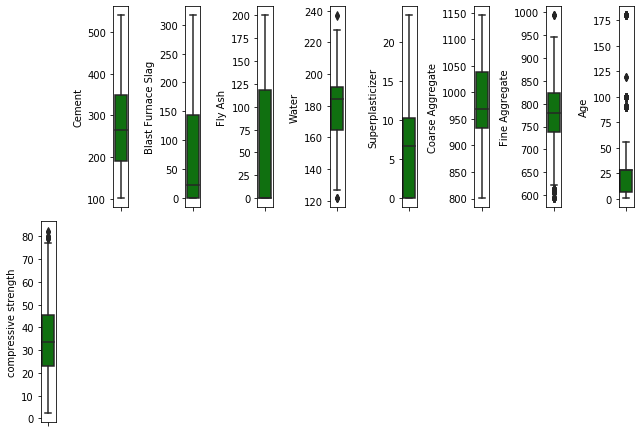

In [23]:
plt.figure(figsize=(9,27))
for i in range(len(col)):
    plt.subplot(9,9,i+2)
    sns.boxplot(con[col[i]], color='green', orient='v')
    plt.tight_layout()

# Variable Transformation

In [24]:
# create 3 datasets:--
# one normal
# one with skewness treatment
# one with skewness treatment and standard scaling
# one with skewness treatment and min max scaling

In [25]:
con1=con.copy()
con2=con.copy()

In [26]:
con3=con.copy()

In [27]:
con1.skew()

Cement                  0.508598
Blast Furnace Slag      0.747848
Fly Ash                 0.461819
Water                  -0.018138
Superplasticizer        0.417771
Coarse Aggregate       -0.087918
Fine Aggregate         -0.226181
Age                     1.940232
compressive strength    0.463905
dtype: float64

In [28]:
con1['Age']=np.cbrt(con1['Age'])

In [29]:
con1['Blast Furnace Slag']=np.sqrt(con1['Blast Furnace Slag'])

In [30]:
con1.skew()

Cement                  0.508598
Blast Furnace Slag      0.256664
Fly Ash                 0.461819
Water                  -0.018138
Superplasticizer        0.417771
Coarse Aggregate       -0.087918
Fine Aggregate         -0.226181
Age                     0.373914
compressive strength    0.463905
dtype: float64

In [31]:
con2['Age']=np.cbrt(con2['Age'])
con2['Blast Furnace Slag']=np.sqrt(con2['Blast Furnace Slag'])

In [32]:
con3['Age']=np.cbrt(con3['Age'])
con3['Blast Furnace Slag']=np.sqrt(con3['Blast Furnace Slag'])

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
scx=StandardScaler()
mm=MinMaxScaler()

In [35]:
con2=pd.DataFrame(scx.fit_transform(con2), columns=col)
con3=pd.DataFrame(mm.fit_transform(con3), columns=col)

In [36]:
con2.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
0,2.560018,-0.985189,-0.881108,-0.931858,-0.673479,0.839767,-1.288495,0.055095,2.672236
1,2.560018,-0.985189,-0.881108,-0.931858,-0.673479,1.032755,-1.288495,0.055095,1.590071
2,-0.112021,0.767784,-0.881108,2.346695,-1.129412,-0.549743,-1.365803,1.450514,0.701706
3,0.999703,0.615049,-0.881108,2.346695,-1.129412,-0.549743,-2.345037,0.055095,0.068980
4,-0.112021,0.767784,-0.881108,2.346695,-1.129412,-0.549743,-1.365803,0.055095,0.631417
5,1.926140,-0.985189,-0.881108,2.346695,-1.129412,-0.549743,-2.345037,0.055095,0.238911
6,-0.769304,0.903963,-0.881108,0.558393,-1.129412,0.047232,0.637761,1.450514,0.166231
7,-0.769304,0.903963,-0.881108,0.558393,-1.129412,0.047232,0.637761,0.055095,-0.434835
8,-0.853171,1.277890,-0.881108,2.346695,-1.129412,-0.549743,-1.365803,1.450514,0.420508
9,0.258553,0.446108,-0.881108,2.346695,-1.129412,-0.549743,-1.365803,0.055095,0.748580


In [37]:
con3.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
0,1.000000,0.000000,0.0,0.349241,0.106838,0.694767,0.205720,0.438333,0.967445
1,1.000000,0.000000,0.0,0.349241,0.106838,0.738372,0.205720,0.438333,0.741964
2,0.374429,0.600538,0.0,0.921909,0.000000,0.380814,0.190667,0.749299,0.556864
3,0.634703,0.548213,0.0,0.921909,0.000000,0.380814,0.000000,0.438333,0.425029
4,0.374429,0.600538,0.0,0.921909,0.000000,0.380814,0.190667,0.438333,0.542219


# Model Selection

In [38]:
# regression problem

In [39]:
x=con.iloc[:,:-1]
y=con.iloc[:,-1]

In [40]:
print(x.head(2))
print(y.head(2))
print(x.shape)
print(y.shape)

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  Coarse Aggregate  Fine Aggregate  Age
0   540.0                 0.0      0.0  162.0               2.5            1040.0           676.0   28
1   540.0                 0.0      0.0  162.0               2.5            1055.0           676.0   28
0    79.986111
1    61.887366
Name: compressive strength, dtype: float64
(981, 8)
(981,)


In [41]:
x2=con2.iloc[:,:-1]
y2=con2.iloc[:,-1]

In [42]:
x3=con3.iloc[:,:-1]
y3=con3.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [44]:
from sklearn.metrics import r2_score, mean_squared_error as mse

In [45]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [46]:
x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y2,test_size=0.2,random_state=50)

In [47]:
x3_train, x3_test, y3_train, y3_test=train_test_split(x3,y3,test_size=0.2,random_state=50)

In [48]:
# models=[LinearRegression(), DecisionTreeRegressor(), 
#         SVR(kernel='rbf'), SVR(kernel='poly'), SVR(kernel='linear'), KNeighborsRegressor()]

In [49]:
def get_score(model,x_tr,x_te,y_tr,y_te):
    model.fit(x_tr,y_tr)
    pred=model.predict(x_te)
    return(r2_score(pred,y_te))

In [50]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
svr_rbf=SVR(kernel='rbf')
svr_p=SVR(kernel='poly')
svr_l=SVR(kernel='linear')
knn=KNeighborsRegressor()

In [51]:
get_score(lr,x_train, x_test, y_train, y_test)

0.5621385790414359

In [52]:
get_score(dt,x_train, x_test, y_train, y_test)

0.8820058397847323

In [53]:
get_score(svr_rbf,x_train, x_test, y_train, y_test)

-647.0407120708547

In [54]:
# get_score(svr_p,x_train, x_test, y_train, y_test)

In [58]:
# get_score(svr_l,x_train, x_test, y_train, y_test)

In [59]:
get_score(knn,x_train, x_test, y_train, y_test)

0.5988659488259824

In [60]:
print(get_score(lr,x2_train, x2_test, y2_train, y2_test))
print(get_score(dt,x2_train, x2_test, y2_train, y2_test))
print(get_score(svr_rbf,x2_train, x2_test, y2_train, y2_test))
print(get_score(knn,x2_train, x2_test, y2_train, y2_test))

0.7348430353353246
0.8831021131132675
0.8978749815942434
0.8290158746385795


In [61]:
print(get_score(lr,x3_train, x3_test, y3_train, y3_test))
print(get_score(dt,x3_train, x3_test, y3_train, y3_test))
print(get_score(svr_rbf,x3_train, x3_test, y3_train, y3_test))
print(get_score(knn,x3_train, x3_test, y3_train, y3_test))

0.7348430353353241
0.8884862451258354
0.7743428563939836
0.816380952255521


In [62]:
# the best model is svr_rbf with the standard scaled data

In [63]:
# now, choosing the best value of random_state

In [66]:
r_state=0
max_sc=0
for i in range(10,200,5):
    x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y2,test_size=0.2,random_state=i)
    score=get_score(svr_rbf,x2_train, x2_test, y2_train, y2_test)
    print(i,' ',score)
    if max_sc < score:
        r_state=i
        max_sc=score
print(r_state, ' ', max_sc)

10   0.8051305485677381
15   0.8930672324040466
20   0.9130053430057106
25   0.8682865900030667
30   0.8636595992408338
35   0.8436857231591856
40   0.8847262294421013
45   0.8644135225206122
50   0.8978749815942434
55   0.8511783626465209
60   0.8612241226865907
65   0.8974042924117442
70   0.8618127134919602
75   0.8572770429478785
80   0.8776552389104297
85   0.8433633995543961
90   0.8670620965701064
95   0.8813935051129371
100   0.9151101551401413
105   0.8793858030023112
110   0.8920223194119179
115   0.863960283697392
120   0.8977438013062861
125   0.8622539185653817
130   0.8800664553497062
135   0.8818438865092529
140   0.8662361937830344
145   0.8387858466995044
150   0.8603532328825643
155   0.9190667245489733
160   0.8764235002854561
165   0.8923399037905977
170   0.877650086018608
175   0.869361034885626
180   0.857086232469516
185   0.9199341701396004
190   0.875020440806431
195   0.8516010298081919
185   0.9199341701396004


In [67]:
# the best random_state is 185

In [68]:
x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y2,test_size=0.2,random_state=185)

# Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [70]:
from sklearn.linear_model import Lasso, Ridge

In [85]:
score=cross_val_score(svr_rbf,x2,y2,cv=10)
print(score.mean(), score.std())

0.7486137774924577 0.09317305530155554


In [86]:
ls=Lasso()
rg=Ridge()

In [87]:
print(get_score(ls,x2_train, x2_test, y2_train, y2_test))
print(get_score(rg,x2_train, x2_test, y2_train, y2_test))

0.0
0.8053415158206655


In [88]:
# No problem of over fitting or under fitting

In [89]:
# svr_rbf is the best model

# Ensembling

In [99]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

In [98]:
from sklearn.model_selection import GridSearchCV

In [94]:
params={'n_estimators':[i for i in range(10,150,10)]}

In [100]:
g1=GridSearchCV(AdaBoostRegressor(), params)
g1.fit(x2_train,y2_train)
g1.best_params_

{'n_estimators': 80}

In [101]:
g1=GridSearchCV(RandomForestRegressor(), params)
g1.fit(x2_train,y2_train)
g1.best_params_

{'n_estimators': 110}

In [105]:
abc=AdaBoostRegressor(n_estimators=80, base_estimator=SVR(kernel='rbf'))

In [109]:
rf=RandomForestRegressor(n_estimators=110)

In [110]:
print(get_score(abc,x2_train, x2_test, y2_train, y2_test))
print(get_score(rf,x2_train, x2_test, y2_train, y2_test))

0.9111531091765133
0.9368732576821266


In [111]:
# Random Forest Regressor is the best

In [112]:
param={'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate':[0.001,0.01,0.1,1]}
g2=GridSearchCV(GradientBoostingRegressor(), param)
g2.fit(x2_train,y2_train)
g2.best_params_

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1, 'loss': 'ls'}

In [113]:
gbr=GradientBoostingRegressor(loss='ls', learning_rate=0.1)

In [114]:
print(get_score(gbr,x2_train, x2_test, y2_train, y2_test))

0.9078777420456898


In [115]:
# Still, RandomForest is the best model

In [116]:
# checking cross_val_score for random forest

In [117]:
score=cross_val_score(rf,x2,y2,cv=10)
print(score.mean(), score.std())

0.7415167624527802 0.15302414335801384


In [118]:
# there may be a problem of over fitting

# Saving the Model

In [119]:
import joblib

In [120]:
rf.fit(x2_train,y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=110,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [121]:
joblib.dump(rf,'rf_reg_concrete.pkl')

['rf_reg_concrete.pkl']